In [1]:
import numpy as np
import nibabel as nib

from utils.MedSAM_segment_anything import sam_model_registry
from classes.MedSAMClass import MedSAMWrapper, MedSAMInferer
import utils.promptUtils as prUt
import utils.analysisUtils as anUt

def load_medsam(checkpoint_path, device = 'cuda'):
    device = 'cuda'
    medsam_model = sam_model_registry['vit_b'](checkpoint=checkpoint_path)
    medsam_model = medsam_model.to(device)
    medsam_model.eval()
    return(medsam_model)

def read_im_gt(img_path, gt_path):
    img, gt = nib.load(img_path), nib.load(gt_path)

    ## Check if the volume is already in RAS+
    if nib.aff2axcodes(img.affine) != ('R', 'A', 'S'):
        raise RuntimeWarning('Image not in RAS. Consider reorienting here')
        img_ras = nib.as_closest_canonical(volume_img)

    if nib.aff2axcodes(gt.affine) != ('R', 'A', 'S'):
        raise RuntimeWarning('Label not in RAS. Consider reorienting here')
        gt_ras = nib.as_closest_canonical(gt)

    img, gt = img.get_fdata().astype(np.float32), gt.get_fdata().astype(int)

    return(img, gt)

# Obtain model and inputs
device = 'cuda'
checkpoint_path = '/home/t722s/Desktop/UniversalModels/TrainedModels/medsam_vit_b.pth'
medsam_model = load_medsam(checkpoint_path)

img_path = '/home/t722s/Desktop/Datasets/BratsMini/imagesTs/BraTS2021_01646.nii.gz'
gt_path = '/home/t722s/Desktop/Datasets/BratsMini/labelsTs/BraTS2021_01646.nii.gz'
img, gt = read_im_gt(img_path, gt_path)

#box_prompt = prUt.get_minimal_boxes(gt, 3, 3)
box_prompt = prUt.get_3d_box_for_2d(gt, 3, 3)

# Perform inference
medsam_wrapper = MedSAMWrapper(medsam_model, device)
segmenter = MedSAMInferer(medsam_wrapper, device)
segmentation = segmenter.predict(img, box_prompt)
anUt.compute_dice(segmentation, gt)

Performing inference on slices: 100%|██████████| 41/41 [00:06<00:00,  5.99it/s]


0.41828134503432096

In [6]:
box_prompt.get_slices_to_infer()

[43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83]

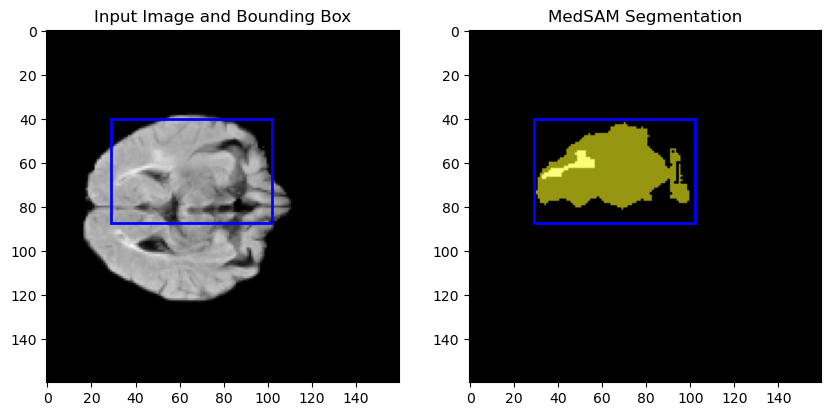

0.10643015521064302

In [7]:
slice_idx = 43
anUt.show_seg_box(slice_idx, img, gt, segmentation, box_prompt)
